# Qtum Price

by: Widya Meiriska

### 1. Read Dataset

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/raw/bitcoin/qtum_price.csv',parse_dates = ['Date'])

In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
25,2017-08-11,15.63,16.36,14.33,14.73,"91,215,900","922,433,000"
26,2017-08-10,12.55,16.99,12.42,15.77,"133,259,000","740,715,000"
27,2017-08-09,11.49,12.63,11.07,12.55,"52,016,000","677,866,000"
28,2017-08-08,12.64,12.74,10.84,11.50,"63,155,600","746,010,000"
29,2017-08-07,10.03,12.84,9.88,12.65,"95,630,200","591,790,000"


### 2. Data Investigation

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [6]:
df.count()

Date          30
Open          30
High          30
Low           30
Close         30
Volume        30
Market Cap    30
dtype: int64

In [7]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

#### There is no missing data here and there are several data which have different format. Some of the data do not use number format

In [8]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
Date          30 non-null datetime64[ns]
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null float64
Market Cap    30 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.7 KB


In [10]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Market Cap,0,0.0


#### Now the data is clean, no null value and has same format

### 3. Data Visualization

In [11]:
# Set Date as it's index
df.set_index('Date', inplace = True )

Text(0.5,1,'Date vs Volume')

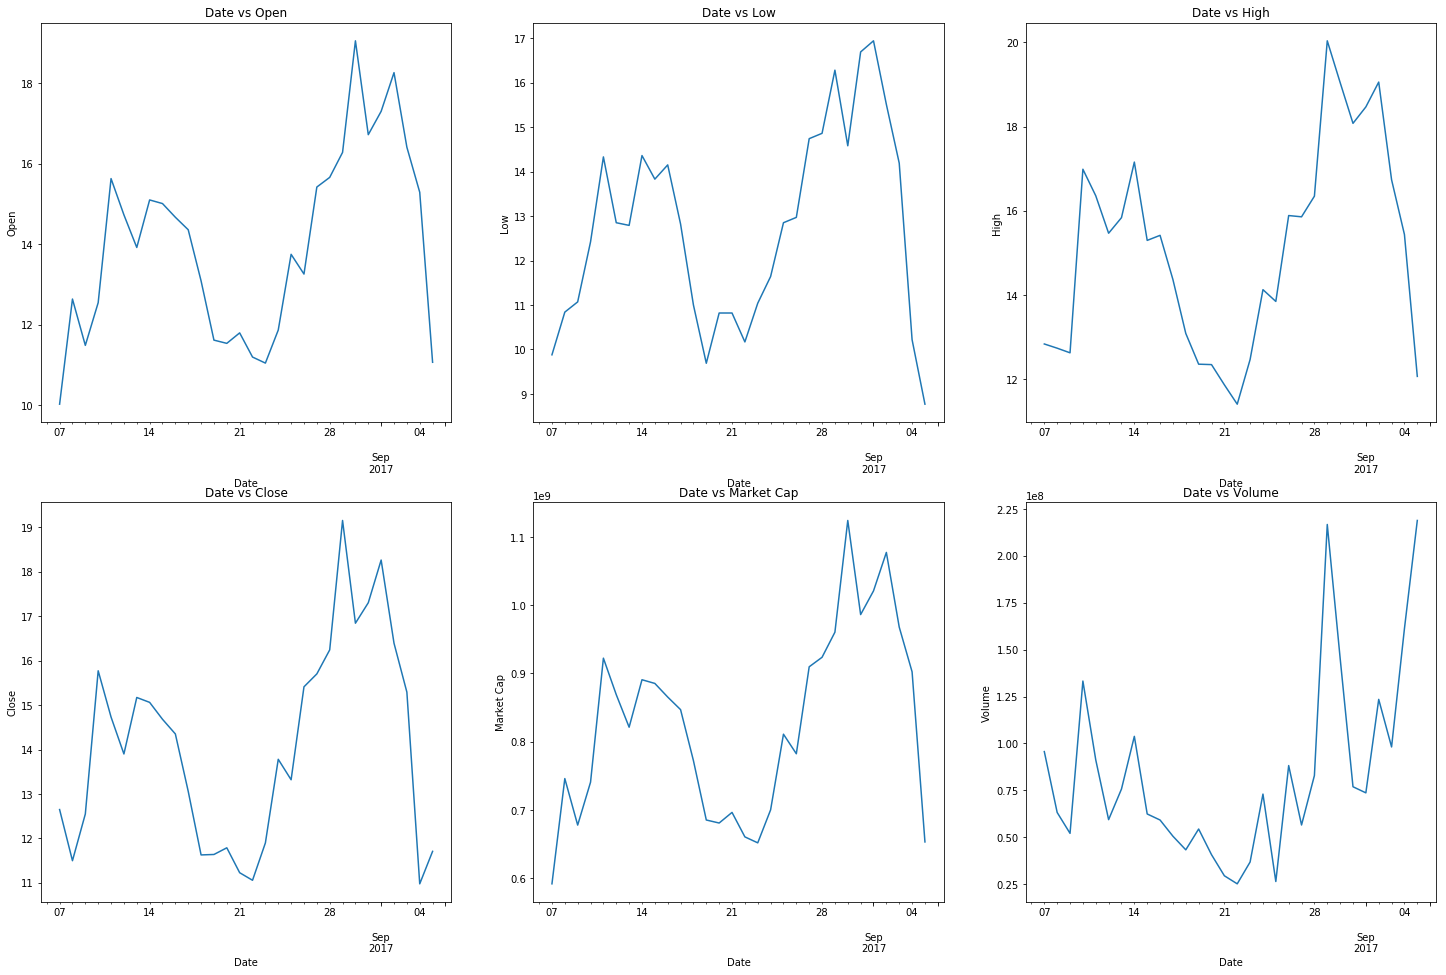

In [12]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
plt.figure(figsize=(25, 25))

plt.subplot(3,3,1)
plt.ylabel('Open')
df.Open.plot()
plt.title('Date vs Open')

plt.subplot(3,3,2)
plt.ylabel('Low')
df.Low.plot()
plt.title('Date vs Low')

plt.subplot(3,3,3)
plt.ylabel('High')
df.High.plot()
plt.title('Date vs High')

plt.subplot(3,3,4)
plt.ylabel('Close')
df.Close.plot()
plt.title('Date vs Close')

plt.subplot(3,3,5)
plt.ylabel('Market Cap')
df['Market Cap'].plot()
plt.title('Date vs Market Cap')

plt.subplot(3,3,6)
plt.ylabel('Volume')
df['Volume'].plot()
plt.title('Date vs Volume')